# Goal of Analysis:

### 1. A model was built to recommend 5 friends to the user, is the test result successful that we should implement to all the users?

### 2. Is the test performing similarly for all user segments or are there differences among different segments?

### 3. If you identified segments that responded differently to the test, can you guess the reason? Would this change your point 1 conclusions?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [2]:
user = pd.read_csv('user_table.csv')
user.head()

,user_id,signup_date
0,34,2015-01-01
1,59,2015-01-01
2,178,2015-01-01
3,285,2015-01-01
4,383,2015-01-01


In [3]:
test = pd.read_csv('test_table.csv')
test.head()

,user_id,date,browser,test,pages_visited
0,600597,2015-08-13,IE,0,2
1,4410028,2015-08-26,Chrome,1,5
2,6004777,2015-08-17,Chrome,0,8
3,5990330,2015-08-27,Safari,0,8
4,3622310,2015-08-07,Firefox,0,1


In [4]:
# merge two datasets to have full set of data

data = pd.merge(left = user, right = test, on = 'user_id')
data.head()

,user_id,signup_date,date,browser,test,pages_visited
0,34,2015-01-01,2015-08-15,Chrome,0,6
1,59,2015-01-01,2015-08-12,Chrome,1,6
2,178,2015-01-01,2015-08-10,Safari,1,3
3,285,2015-01-01,2015-08-03,Opera,0,5
4,383,2015-01-01,2015-08-05,Firefox,1,9


In [5]:
user.shape, test.shape, data.shape

((100000, 2), (100000, 5), (100000, 6))

### Qusetion 1: Is the test winning?

In [6]:
data.groupby('test')['pages_visited'].mean()

test
0    4.608394
1    4.599693
Name: pages_visited, dtype: float64

We can see that the mean of two groups don't have large difference.

In [7]:
# perform student's t-test
from scipy.stats import ttest_ind

control_page = data[data['test'] == 0]['pages_visited'].values
experiment_page = data[data['test'] == 1]['pages_visited'].values

print('T-test:\t', ttest_ind(a=control_page, b=experiment_page, equal_var=False))

T-test:	 Ttest_indResult(statistic=0.5571118435554797, pvalue=0.5774523171559118)


The result shows that the test statistic is 0.577, which is larger than 5%, so we cannot reject the null hypothesis that there is no difference between control and experimet group. 

Therefore, the test doesn't win at all, and we should not expand it to all the users.

### Question 2: Is the test performing similarly for all user segments?

In [8]:
# first convert the date into datetime in the dataframe

data['date'] = pd.to_datetime(data.date)
data['signup_date'] = pd.to_datetime(data.signup_date)

In [9]:
# process the data

data['interval'] = (data['date'] - data['signup_date']).apply(lambda x: x.days)
data['is_first'] = (data['interval'] == 0).astype(int)
data['dayofweek'] = data['date'].apply(lambda x: x.dayofweek)

data.head()

,user_id,signup_date,date,browser,test,pages_visited,interval,is_first,dayofweek
0,34,2015-01-01,2015-08-15,Chrome,0,6,226,0,5
1,59,2015-01-01,2015-08-12,Chrome,1,6,223,0,2
2,178,2015-01-01,2015-08-10,Safari,1,3,221,0,0
3,285,2015-01-01,2015-08-03,Opera,0,5,214,0,0
4,383,2015-01-01,2015-08-05,Firefox,1,9,216,0,2


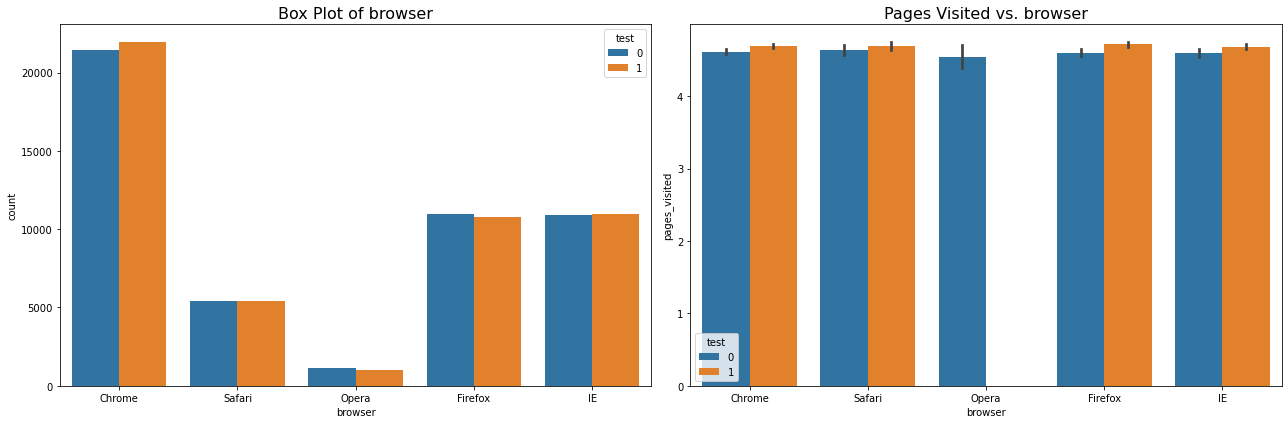

In [10]:
# visualization of browser

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='browser', hue='test', data=data, ax=ax[0])
ax[0].set_title('Box Plot of browser', fontsize=16)

sns.barplot(x='browser', y='pages_visited', hue='test', data=data, ax=ax[1])
ax[1].set_title('Pages Visited vs. browser', fontsize=16)
plt.tight_layout()
plt.show()

For different browser, Chrome has the largest number of usrs, but in terms of pages visited, Chrome is almost the same as Safari.

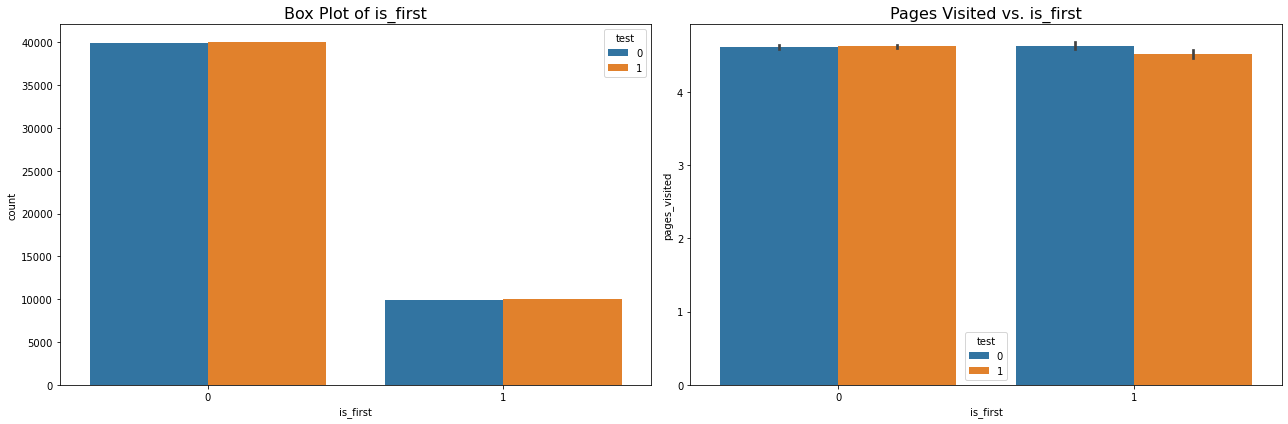

In [11]:
# visualization of is_first

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='is_first', hue='test', data=data, ax=ax[0])
ax[0].set_title('Box Plot of is_first', fontsize=16)

sns.barplot(x='is_first', y='pages_visited', hue='test', data=data, ax=ax[1])
ax[1].set_title('Pages Visited vs. is_first', fontsize=16)
plt.tight_layout()
plt.show()

In terms of pages visited, it seems that whether it's the first time doesn't seem to make many differences.

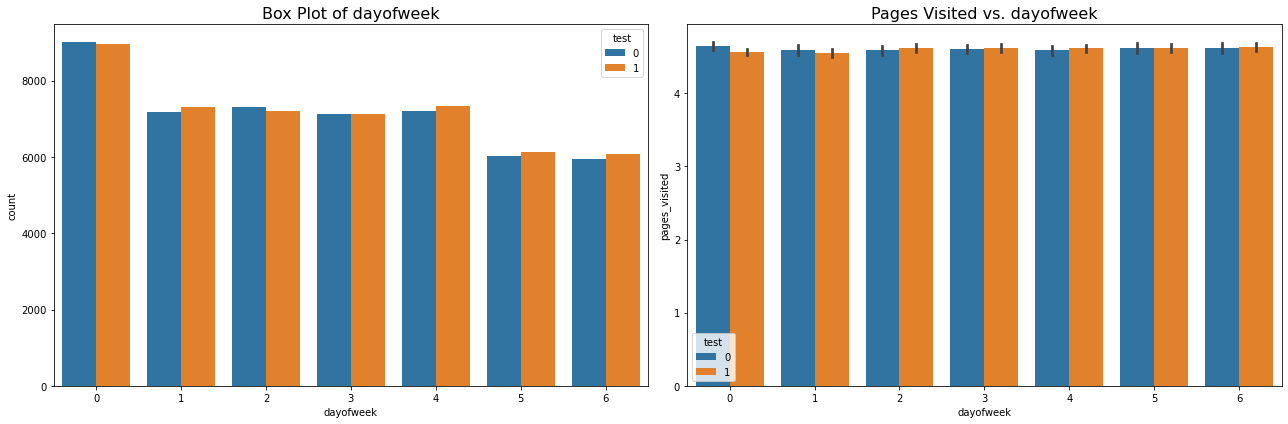

In [12]:
# visualization of dayofweek

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='dayofweek', hue='test', data=data, ax=ax[0])
ax[0].set_title('Box Plot of dayofweek', fontsize=16)

sns.barplot(x='dayofweek', y='pages_visited', hue='test', data=data, ax=ax[1])
ax[1].set_title('Pages Visited vs. dayofweek', fontsize=16)
plt.tight_layout()
plt.show()

For all the users, Sunday (day 0) is the most visited day, but in terms of pages visited, the day of week doesn't seem to have many differences.

### Question 3: If you identified segments that responded differently to the test, can you guess the reason? Would this change your point 1 conclusions?

From the chart above, we can see that the browser Opera has the lowest visited number and doesn't seem to have a clear distinction in test and control group, so we will remove the Opera and see whether the result will change.

In [13]:
subset = data[data['browser'] != 'Opera']
subset.groupby('test')['pages_visited'].mean()

test
0    4.609804
1    4.694989
Name: pages_visited, dtype: float64

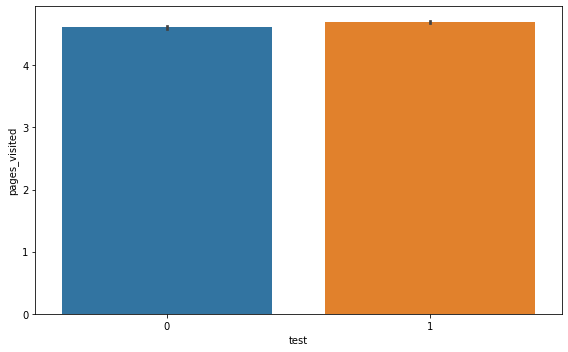

In [14]:
# visualization

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='test', y='pages_visited', data=subset, ax=ax)
plt.tight_layout()
plt.show()

In [15]:
# perform student's t-test

control_page = subset[subset['test'] == 0]['pages_visited'].values
experiment_page = subset[subset['test'] == 1]['pages_visited'].values

print('T-test:\t', ttest_ind(a=control_page, b=experiment_page, equal_var=False))

T-test:	 Ttest_indResult(statistic=-5.474295518566027, pvalue=4.403954129457701e-08)


We can see that if we remove Opera, the test statistic is -5.47, the new feature seems to be significantly userful now, we can also take a look at the is_first visualization.

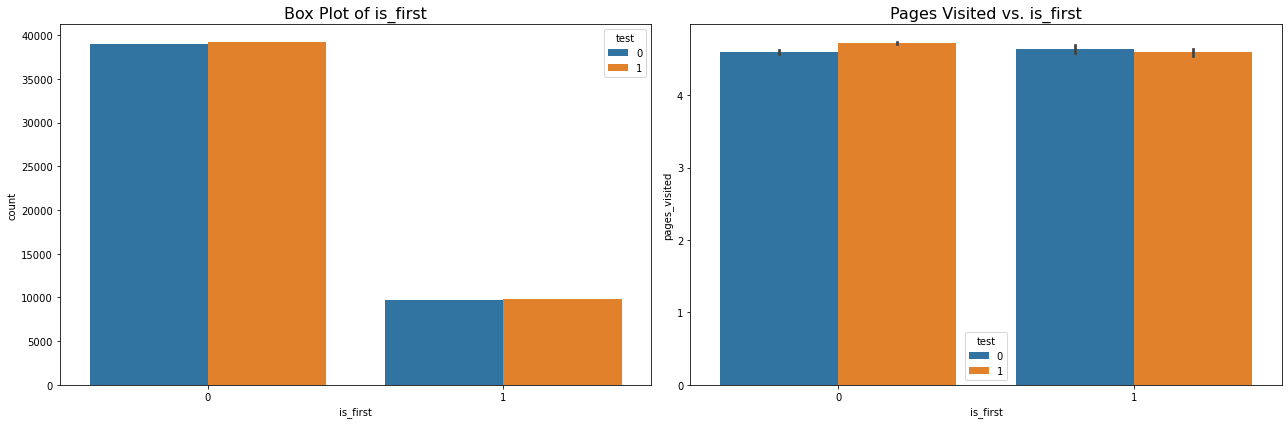

In [16]:
# visualization of is_first

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='is_first', hue='test', data=subset, ax=ax[0])
ax[0].set_title('Box Plot of is_first', fontsize=16)

sns.barplot(x='is_first', y='pages_visited', hue='test', data=subset, ax=ax[1])
ax[1].set_title('Pages Visited vs. is_first', fontsize=16)
plt.tight_layout()
plt.show()

There are clear test and control group now, so removing the Opera will change my conclusion in Question 1.